In [9]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from mpl_toolkits import mplot3d

from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessRegressor as GP

from IPython.display import Image

# General Matplotlib Tips

## Setting Styles

In [2]:
plt.style.use('classic')

## show(), No show()? How to display plots

### Plotting from a script
If you're using within a script, plt.show() it's your frend.
plt.show() starts an event loop, looks for all currently active figure objects

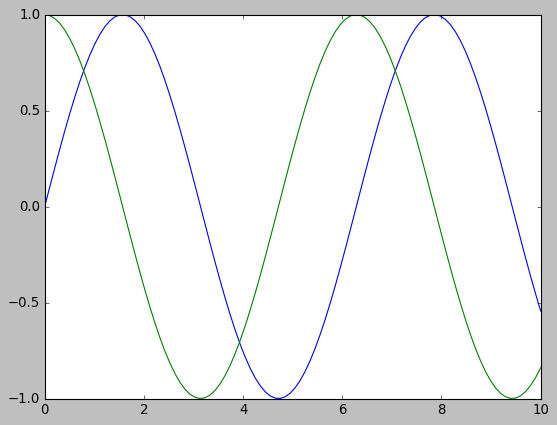

In [3]:
# file: testplot.py
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(0, 10, 100) 

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x)) 

plt.show()

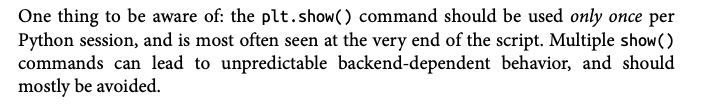

### Plotting from an IPython shell

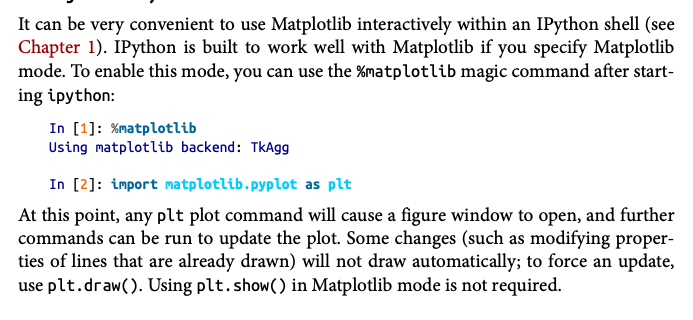

### Plotting from IPython notebook

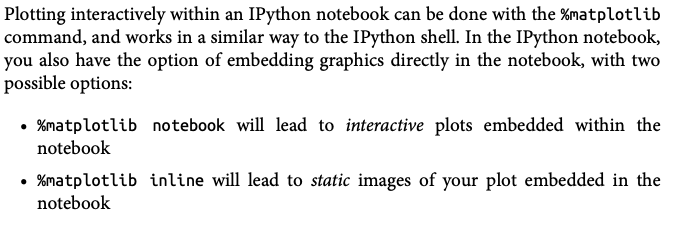

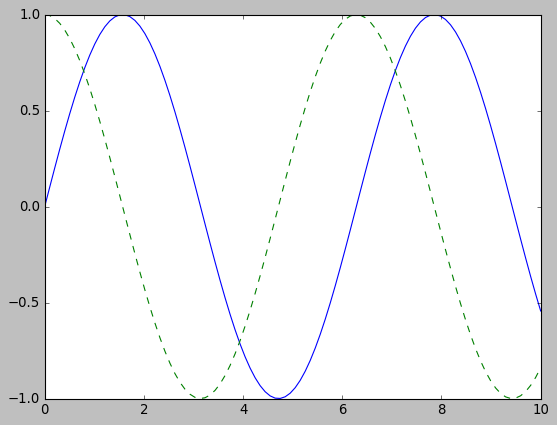

In [4]:
x = np.linspace(0, 10, 100)

fig = plt.figure() 
plt.plot(x, np.sin(x), '-') 
plt.plot(x, np.cos(x), '--');

## Saving Figures to File

In [5]:
fig.savefig('my_figure.png')

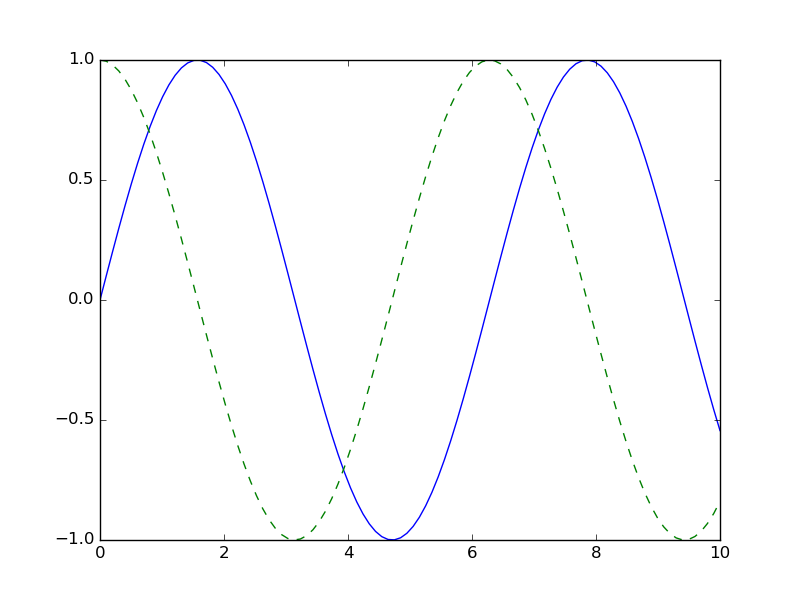

In [6]:
Image('my_figure.png')

In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

# Two interfaces for the price of one

## MATLAB-style interface
It’s important to note that this interface is stateful: it keeps track of the “current” figure
and axes, which are where all plt commands are applied. You can get a reference to these using the plt.gcf() (get current figure) and plt.gca() (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

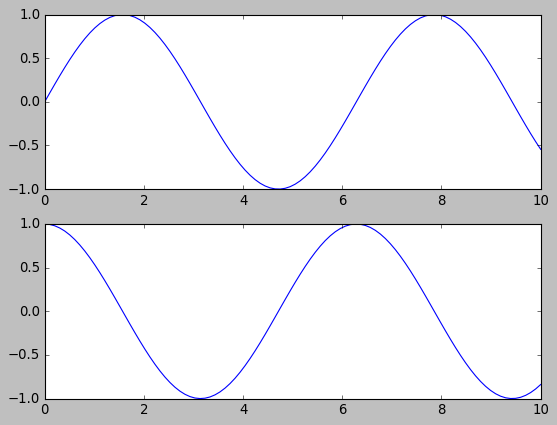

In [8]:
plt.figure() # Create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) #(rows, cols, panel number)
plt.plot(x, np.sin(x))

# Create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

## Object-oriented Interface

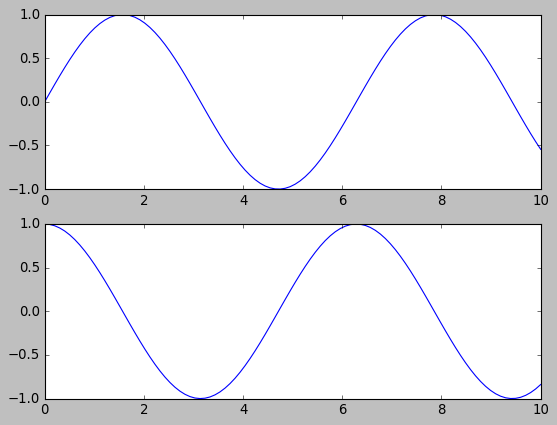

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# call plot() method of the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

# Simple Line Plots

In [10]:
# Change other style
plt.style.use('seaborn-whitegrid')

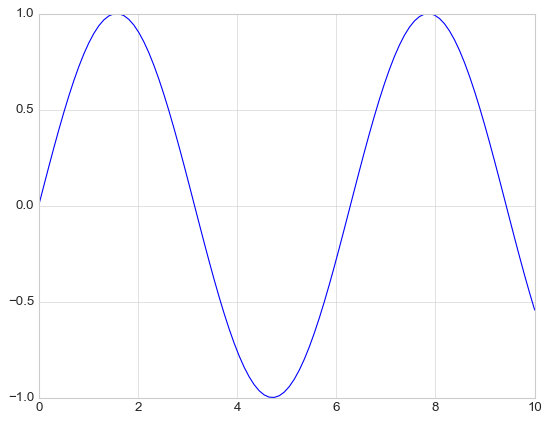

In [11]:
# Self-create fig and ax
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

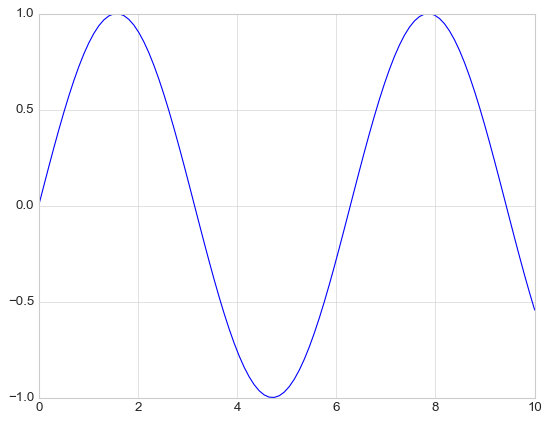

In [12]:
# Use pylab interface to auto-create fig and ax
plt.plot(x, np.sin(x))

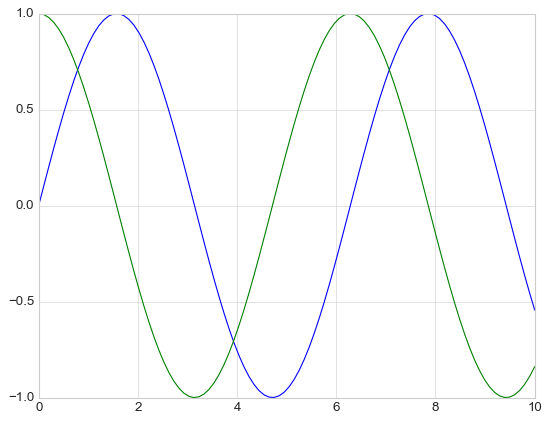

In [13]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

## Adjusting the Plot: Line Colors and Styles
If no color specified, Matplotlib will auto cycle through a set of default colors for multiple line

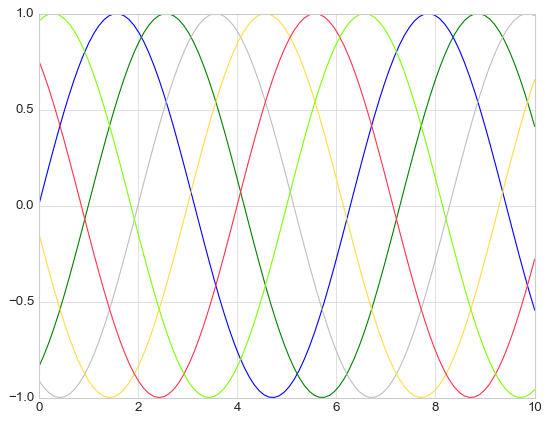

In [14]:
plt.plot(x, np.sin(x - 0), color='blue') # Specifying color by name 
plt.plot(x, np.sin(x - 1), color='g') # Specifying color by color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # Specifying color by grayscale (0-1)
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Specifying color by Hexcode (RRGGBB from 00-FF)
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # Specifying color by RGB Tuple (0-1)
plt.plot(x, np.sin(x - 5), color='chartreuse') # Specifying color by HTML color names

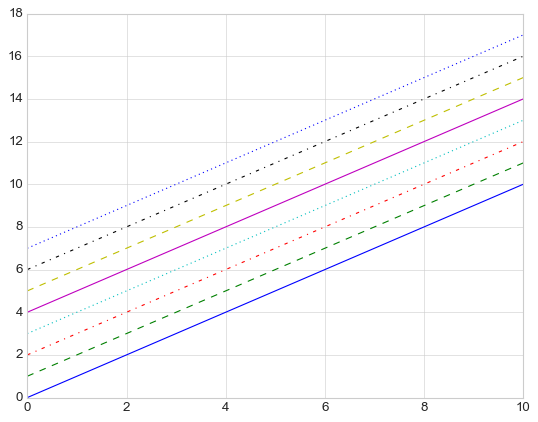

In [16]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

# For short, u can use code
plt.plot(x, x+4, linestyle='-') # solid
plt.plot(x, x+5, linestyle='--') # dashed
plt.plot(x, x+6, linestyle='-.') # dashed dot
plt.plot(x, x+7, linestyle=':') # dotted

You can combine linestyle and color codes

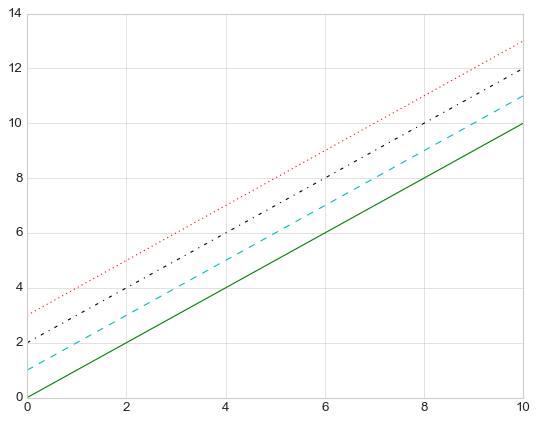

In [17]:
plt.plot(x, x+0, '-g')
plt.plot(x, x+1, '--c')
plt.plot(x, x+2, '-.k')
plt.plot(x, x+3, ':r')

## Adjusting the Plot: Axes Limits

(-1.5, 1.5)

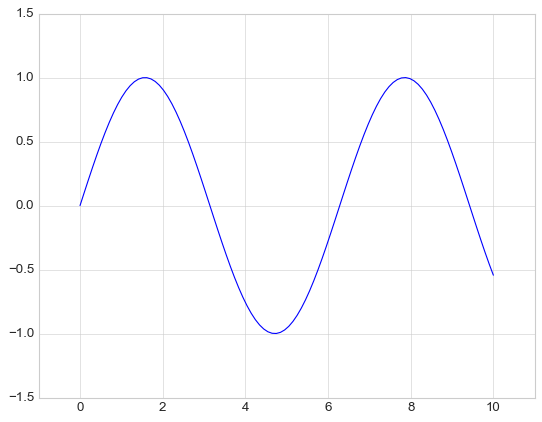

In [18]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

If you want the either axis to display in reverse, reverse the order of args

(1.2, -1.2)

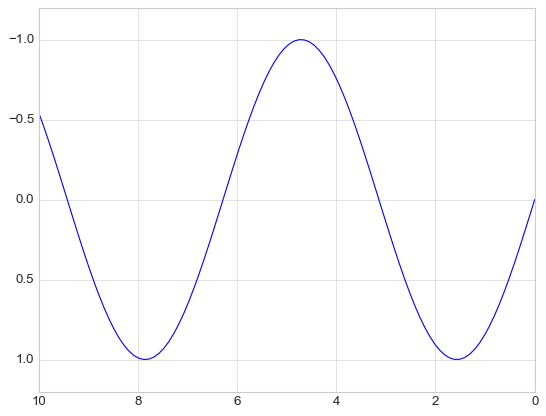

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

np.axis() allows you to set limit for both axis in one call, automatcally tightent the bound around the plot, or ensuring equal aspect ration such that on the screen, one unit in x == one unit in y

[-1, 11, -1.5, 1.5]

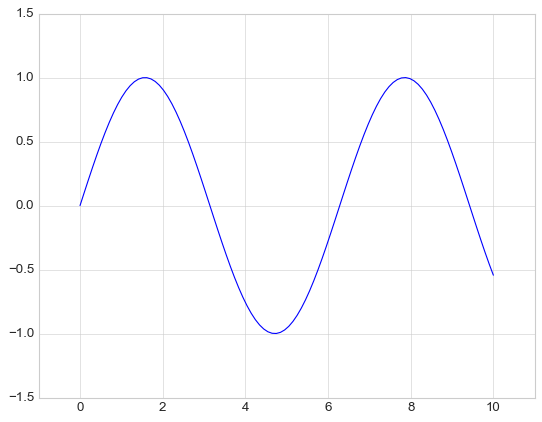

In [20]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

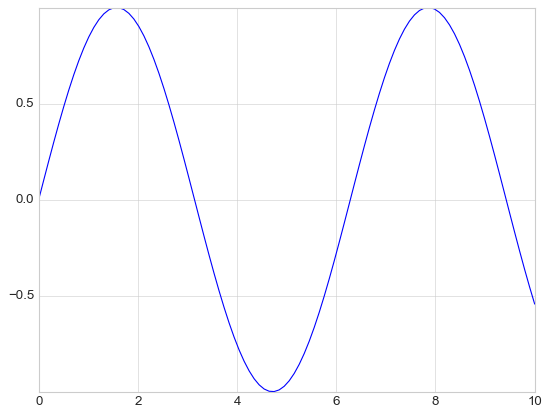

In [23]:
plt.plot(x, np.sin(x))
plt.axis('tight');

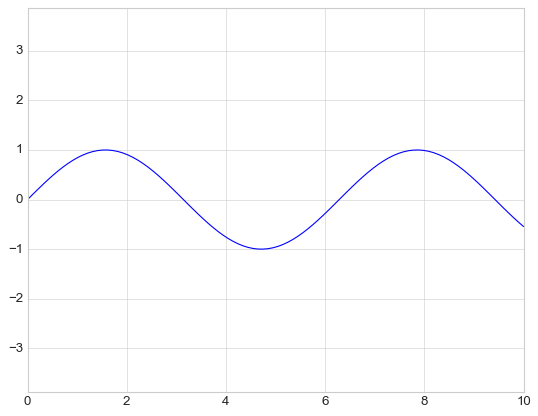

In [24]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Labeling plots

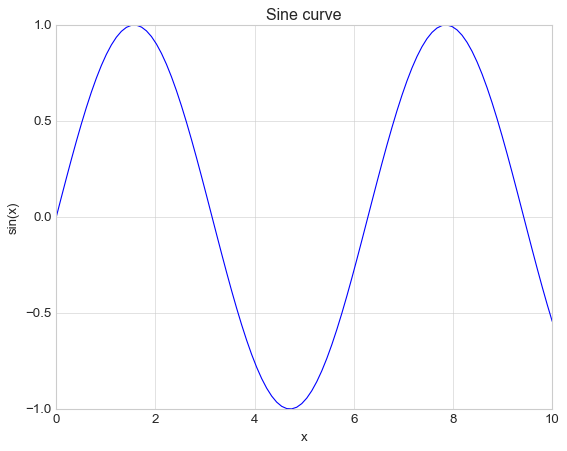

In [25]:
plt.plot(x, np.sin(x))
plt.title('Sine curve')

plt.xlabel('x')
plt.ylabel('sin(x)');

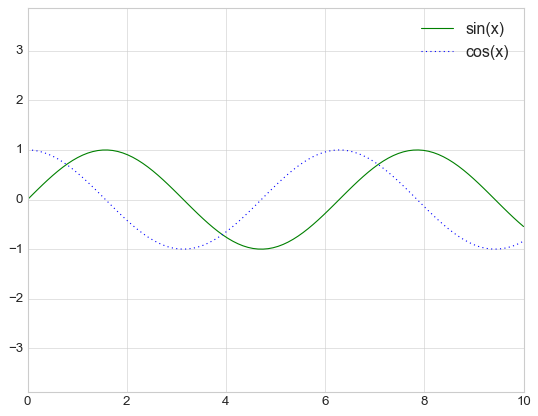

In [27]:
# Different line with legend in one plot
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

# Matplotlib Gotchas

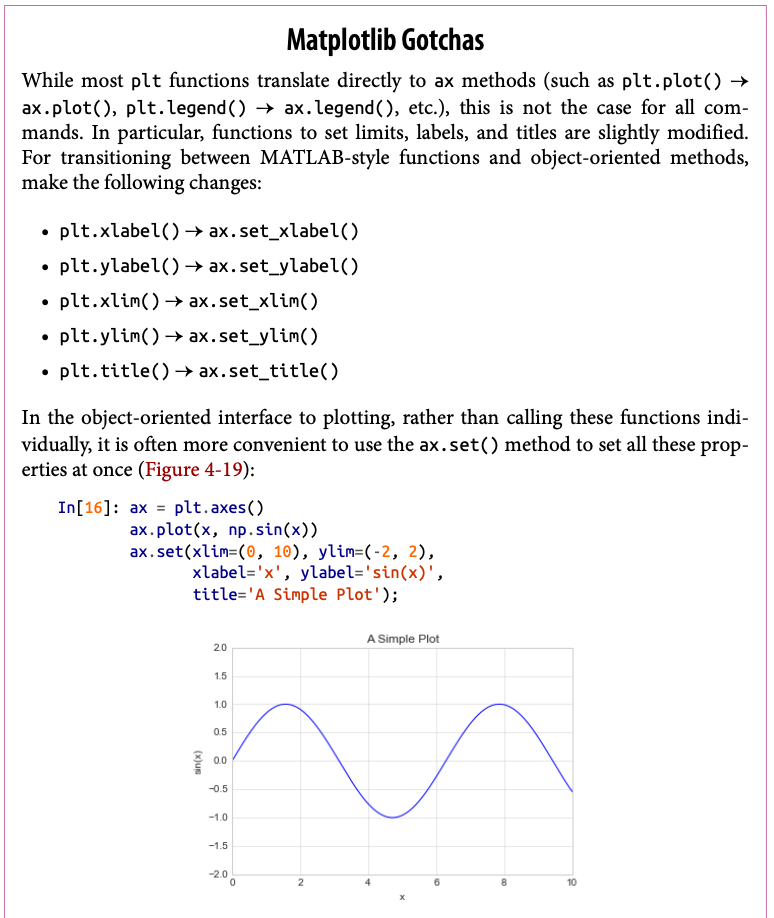

# Simple Scatter Plots


## Scatter Plots with plt.plot

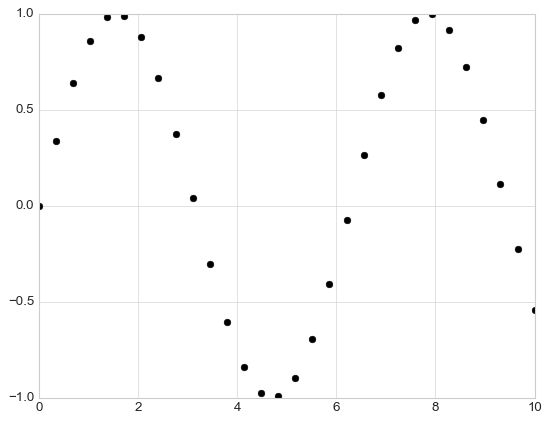

In [29]:
x = np.linspace(0, 10, 30)
y= np.sin(x)

# third param is the symble for marking
plt.plot(x, y, 'o', color='black');

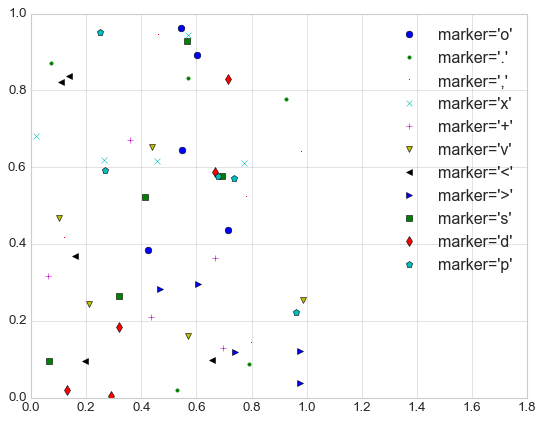

In [38]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '<', '>', 's', 'd', 'p']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))

plt.legend(numpoints=1)
plt.xlim(0, 1.8);

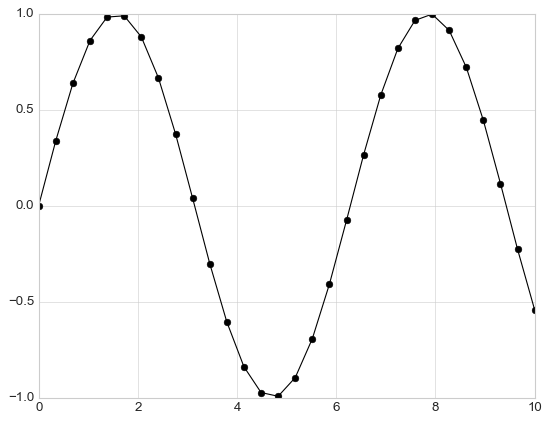

In [36]:
plt.plot(x, y, '-ok'); # Line (-), circle marker(o), black(k)

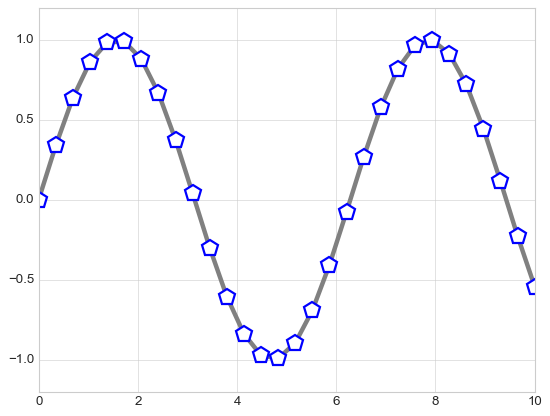

In [40]:
plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='blue',
        markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with plt.scatter

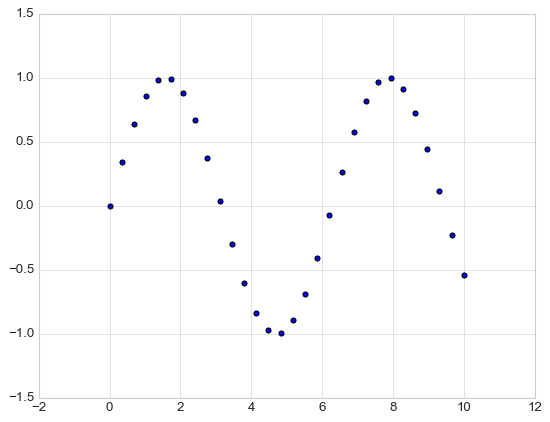

In [41]:
plt.scatter(x, y, marker='o')

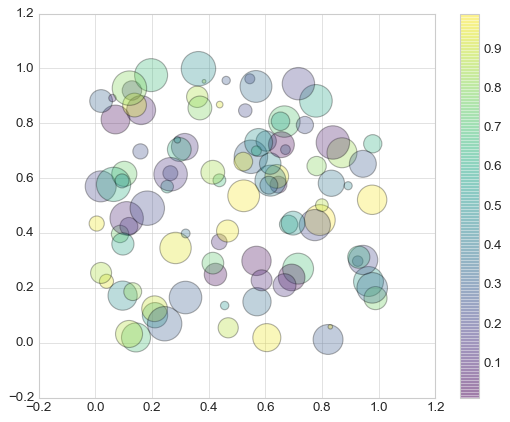

In [43]:
rng = np.random.RandomState(0)
x = rng.rand(100)
y = rng.rand(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

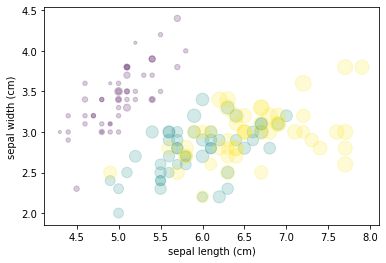

In [4]:
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## plot vs scatter: efficiency note

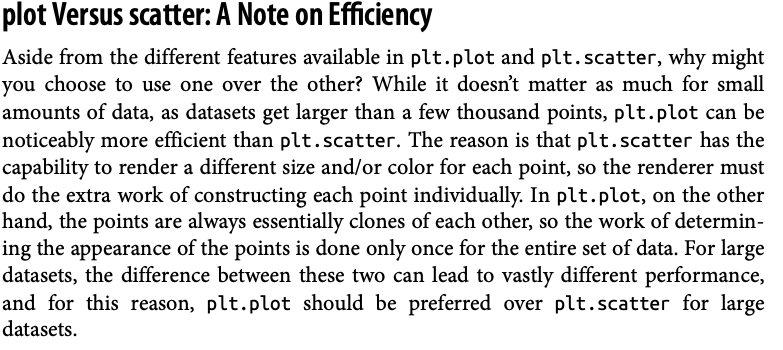

# Visualizing Errors

## Basic Errorbars

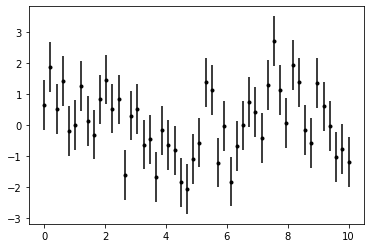

In [6]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

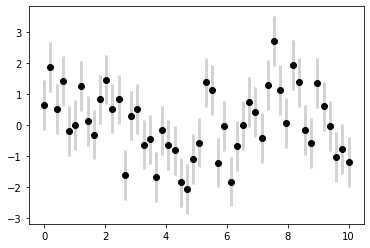

In [8]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0);

## Continuos Errors

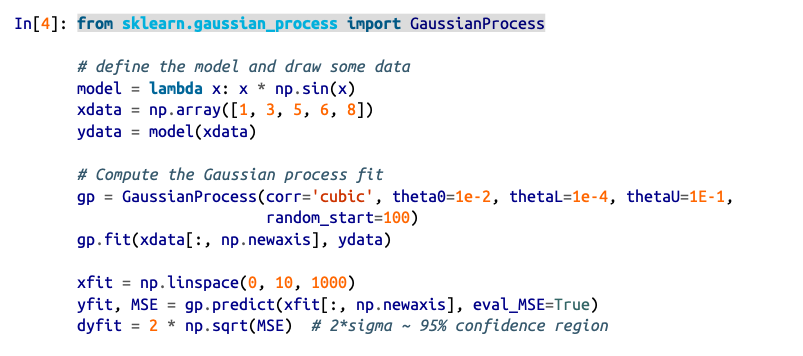

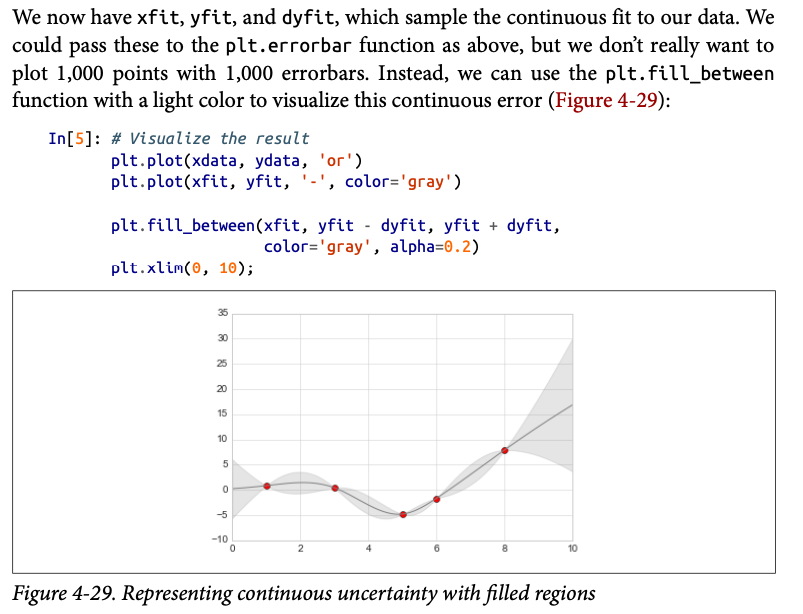

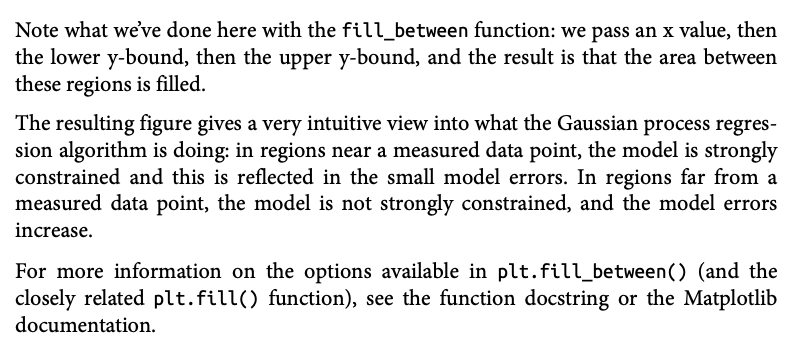

# Density and Contour Plots

In [15]:
plt.style.use('seaborn-white')

## Visualizing a 3D Func

In [16]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [17]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(x, Y)

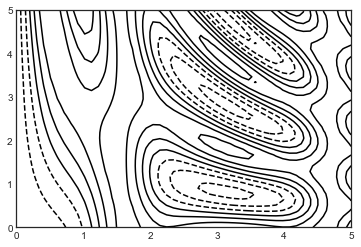

In [20]:
plt.contour(X, Y, Z, colors='black');

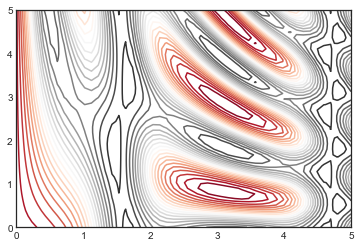

In [22]:
# 20 -> specify want more lines to be drawn - 20 equally spaced intervals
plt.contour(X, Y, Z, 20, cmap='RdGy');

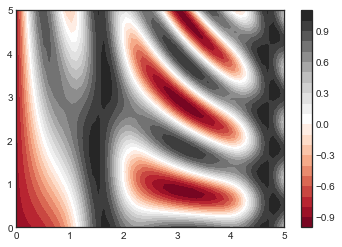

In [23]:
plt.contourf(X, Y, Z, 20, cmap='RdGy') 
plt.colorbar();

A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.
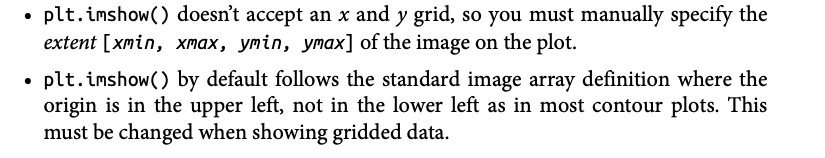

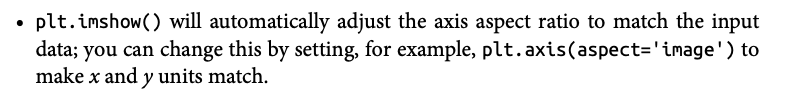

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

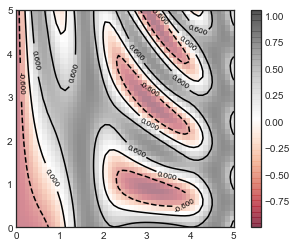

In [26]:
contours = plt.contour(X, Y, Z, 3, colors='black')
#Overplot contours with label
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z,extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy', alpha=0.5)
plt.colorbar();

# Historgram, Binnings, Density

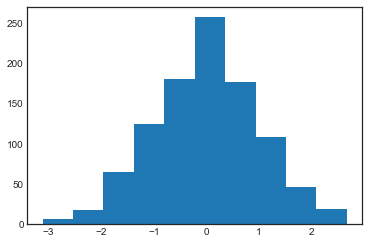

In [34]:
data = np.random.randn(1000)

plt.hist(data);

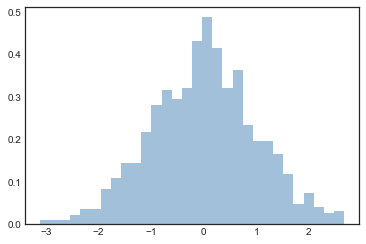

In [36]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [37]:
x1 = np.random.normal(0, 0.8, 1000) 
x2 = np.random.normal(-2, 1, 1000) 
x3 = np.random.normal(3, 2, 1000)

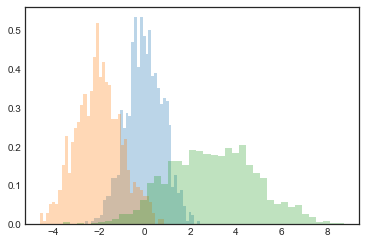

In [38]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs) 
plt.hist(x2, **kwargs) 
plt.hist(x3, **kwargs);

In [39]:
# Only compute histogram
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 24 189 437 285  65]


## 2D Histogram and Binnings

In [40]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

### plt.hist2d: 2D histogram

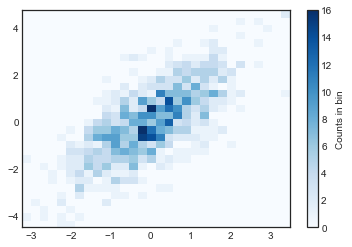

In [41]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in bin')

In [42]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### plt.hexbin: Hexagonal binnings

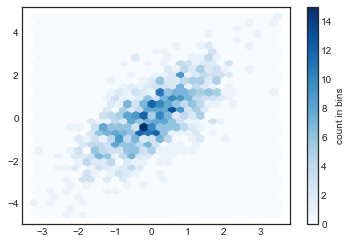

In [43]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bins')

# Customizing Plot Legends

In [44]:
plt.style.use('classic')

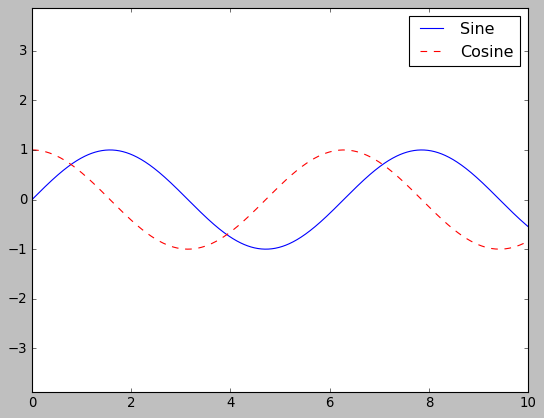

In [47]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')

leg = ax.legend();

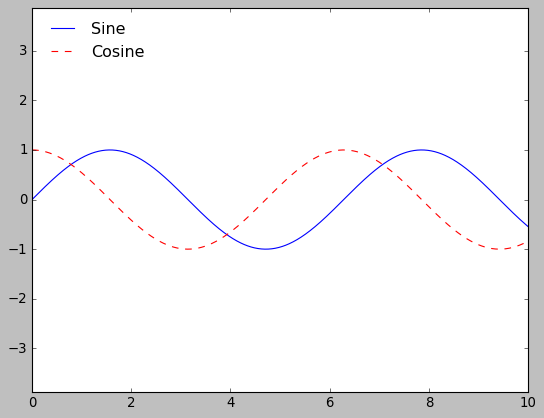

In [48]:
ax.legend(loc='upper left', frameon=False)
fig

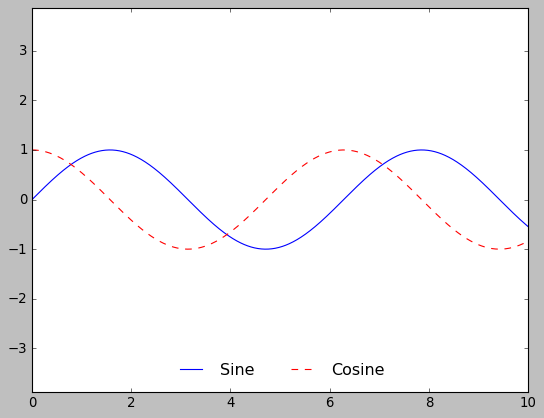

In [49]:
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

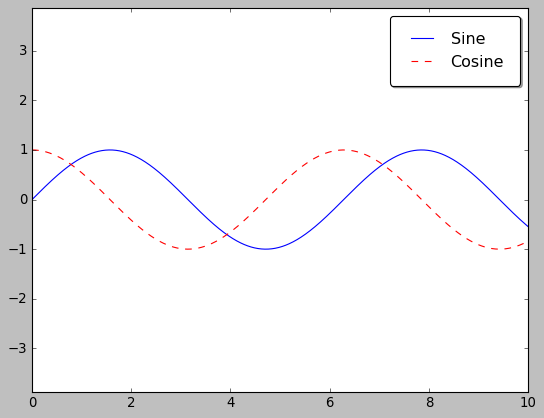

In [50]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1) 
fig

## Choosing Elements for the Legend

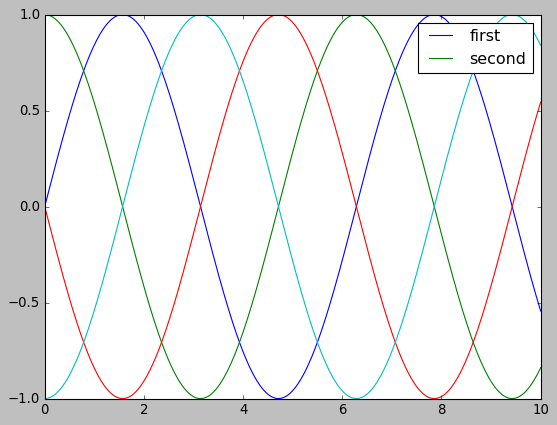

In [51]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

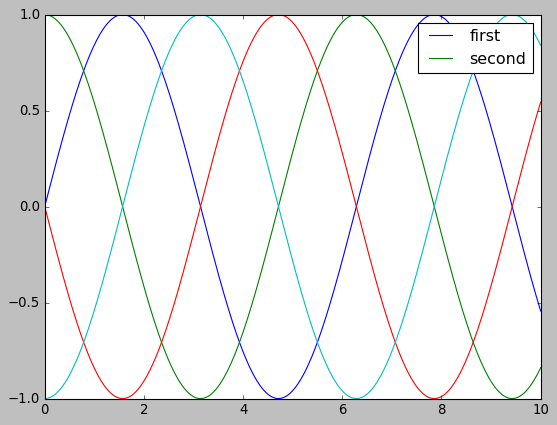

In [53]:
# This method is better
plt.plot(x, y[:, 0], label='first') 
plt.plot(x, y[:, 1], label='second') 

plt.plot(x, y[:, 2:]) 
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

In [54]:
cities = pd.read_csv('data/california_cities.csv')

In [56]:
 # Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

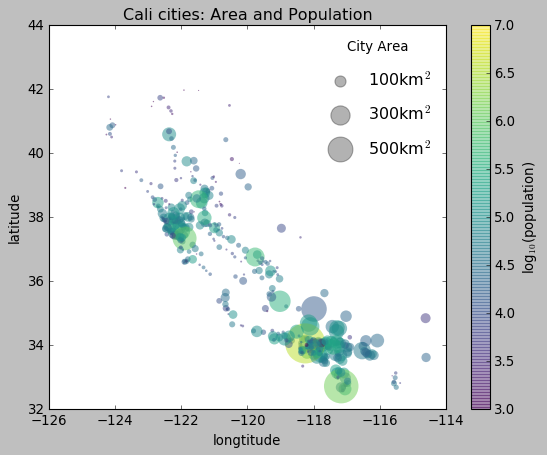

In [57]:
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Create legend
# plot empty lists with the deisred size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='City Area')

plt.title('Cali cities: Area and Population');

## Multiple Legends

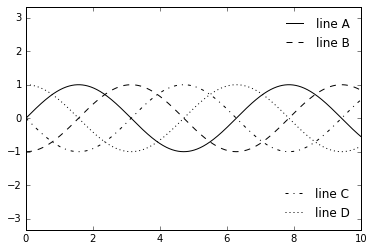

In [61]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':'] 
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                                styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
leg = Legend(ax, lines[2:], ['line C', 'line D'],
loc='lower right', frameon=False) 
ax.add_artist(leg);

# Customizing Colorbars

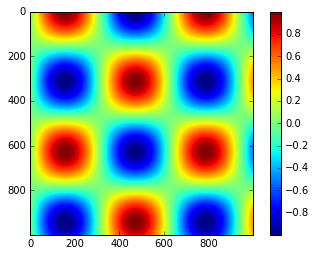

In [62]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

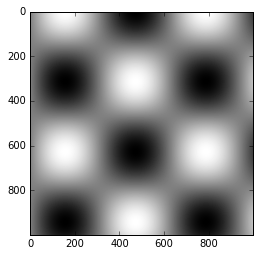

In [63]:
plt.imshow(I, cmap='gray');

plt.cm.\<TAB> FOR ALL COLOR FOR CMAP

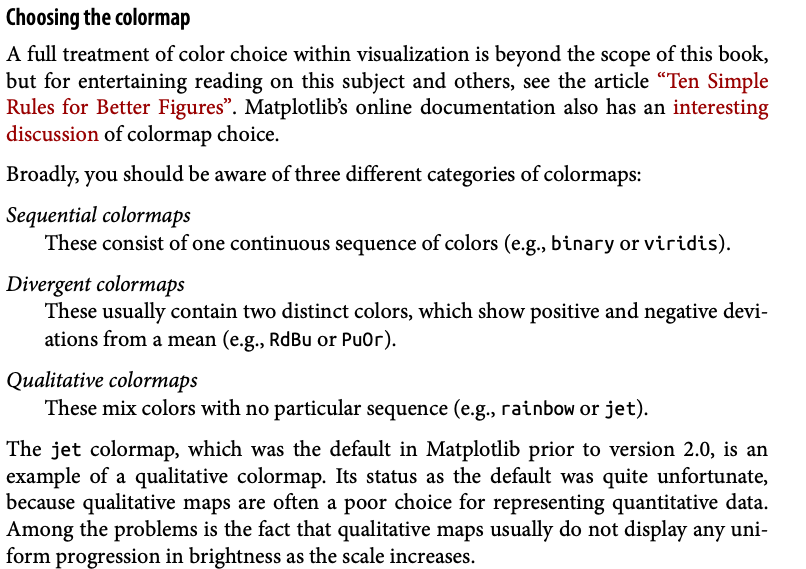

# Multiple Subplots

## plt.axes: Subplots by Hand
plt.axes also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent [bottom, left, width, height] in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

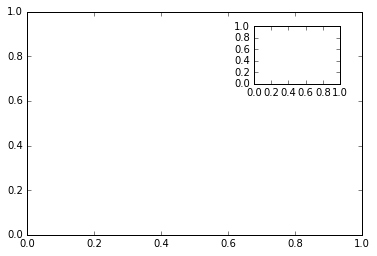

In [64]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

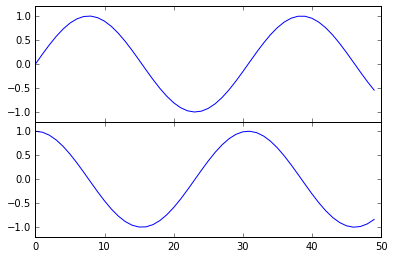

In [67]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10) 
ax1.plot(np.sin(x)) 
ax2.plot(np.cos(x));

## plt.subplot: Simple grids of subplots

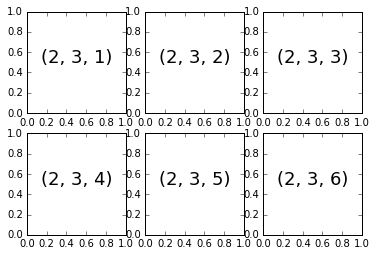

In [68]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

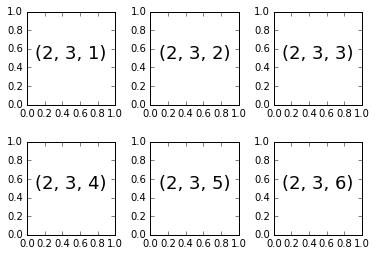

In [71]:
fig = plt.figure()
# the space is 40% of the subplot width and height
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

## plt.subplots: The Whole Grid in One Go

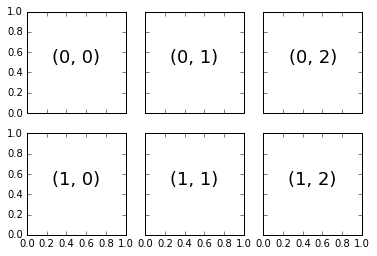

In [79]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row');

# axes are in a 2d array, indexed [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i,j)), fontsize=18, ha='center')

## plt.GridSpec: More Complicated Arrangements

In [81]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

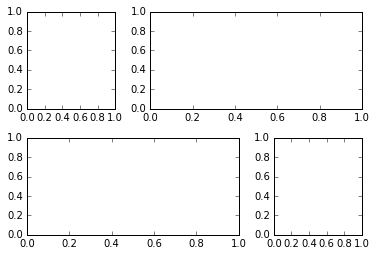

In [89]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

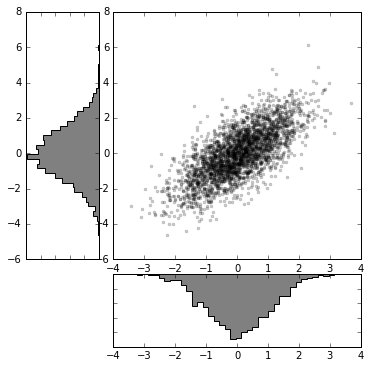

In [91]:
 # Create some normally distributed data mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax) 
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Text and Annotation

In [92]:
plt.style.use('seaborn-whitegrid')

<ipython-input-100-21eec4226479>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


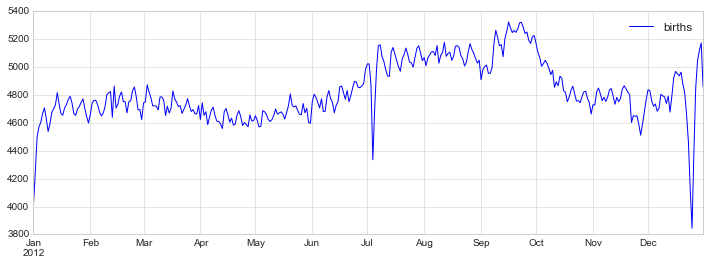

In [100]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d') 

births_by_date = births.pivot_table('births', [births.index.month, births.index.day]) 
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

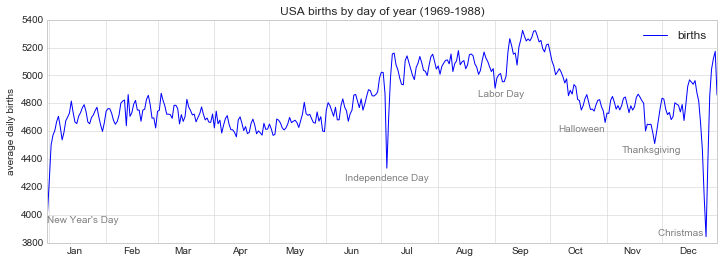

In [103]:
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style) 
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style) 
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style) 
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style) 
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style) 
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator()) 
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15)) 
ax.xaxis.set_major_formatter(plt.NullFormatter()) 
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

## Transforms and Text Position
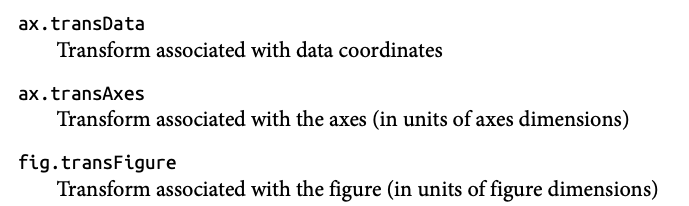

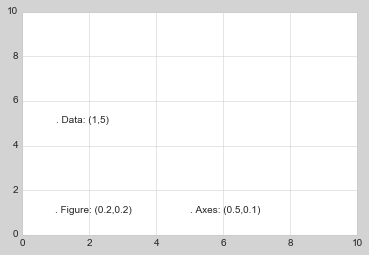

In [105]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0 ,10])

# transform = ax.tranData is default
ax.text(1, 5, ". Data: (1,5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5,0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2,0.2)", transform=fig.transFigure);

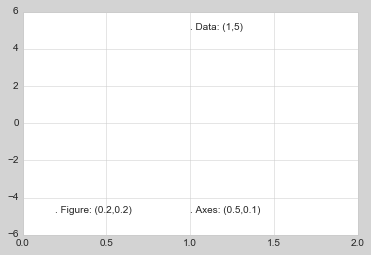

In [108]:
ax.set_xlim(0, 2) 
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

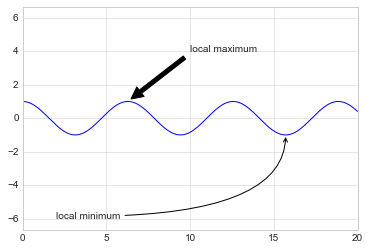

In [109]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000) 
ax.plot(x, np.cos(x)) 
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), 
            arrowprops=dict(arrowstyle="->",
            connectionstyle="angle3,angleA=0,angleB=-90"));

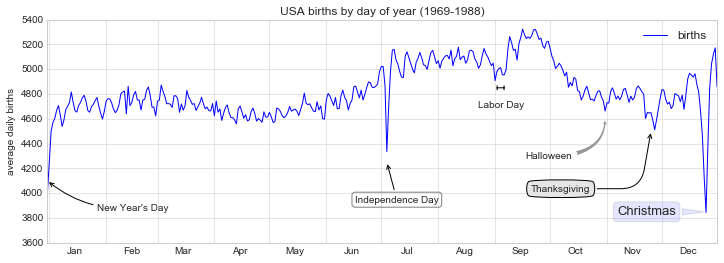

In [112]:
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax)
    # Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data', 
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center', xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none",
            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data', xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->",
            connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
       
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator()) 
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15)) 
ax.xaxis.set_major_formatter(plt.NullFormatter()) 
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

# Customizing ticks

## Major/ Minor Ticks

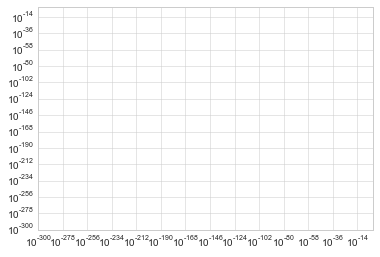

In [113]:
ax = plt.axes(xscale='log', yscale='log')

In [114]:
print(ax.xaxis.get_major_locator()) 
print(ax.xaxis.get_minor_locator())

In [116]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels

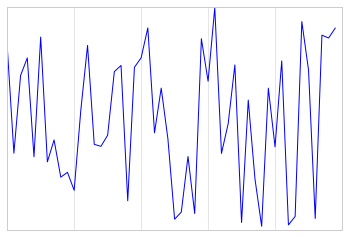

In [117]:
ax = plt.axes() 
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator()) 
ax.xaxis.set_major_formatter(plt.NullFormatter())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/termanteuse/scikit_learn_data


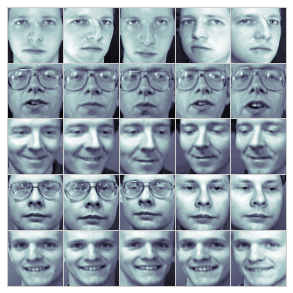

In [119]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5)) 
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces 

faces = fetch_olivetti_faces().images
for i in range(5): 
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator()) 
        ax[i, j].yaxis.set_major_locator(plt.NullLocator()) 
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

## Reducing/ Increasing the number of ticks

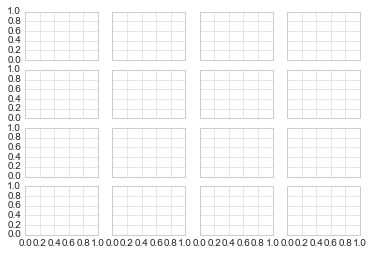

In [120]:
 fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

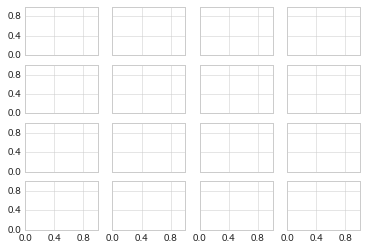

In [121]:
# For every axis, set the x and y major locator 
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## Fancy Tick Formats

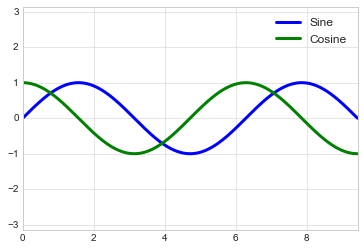

In [122]:
# Plot a sine and cosine curve 
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000) 
ax.plot(x, np.sin(x), lw=3, label='Sine') 
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True) 
ax.legend(frameon=False) 
ax.axis('equal') 
ax.set_xlim(0, 3 * np.pi);

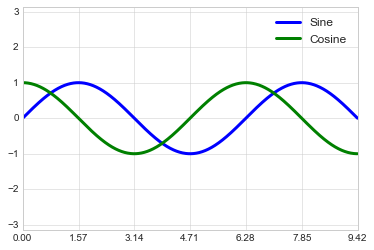

In [125]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2)) 
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4)) 
fig

In [126]:
def format_func(value, tick_number): # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi)) 
    if N==0:
        return "0"
    elif N==1:
        return r"$\pi/2$"
    elif N==2: return r"$\pi$"
    elif N%2>0: return r"${0}\pi/2$".format(N)
    else: return r"${0}\pi$".format(N // 2)


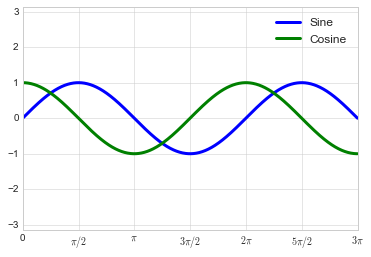

In [129]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func)) 
fig

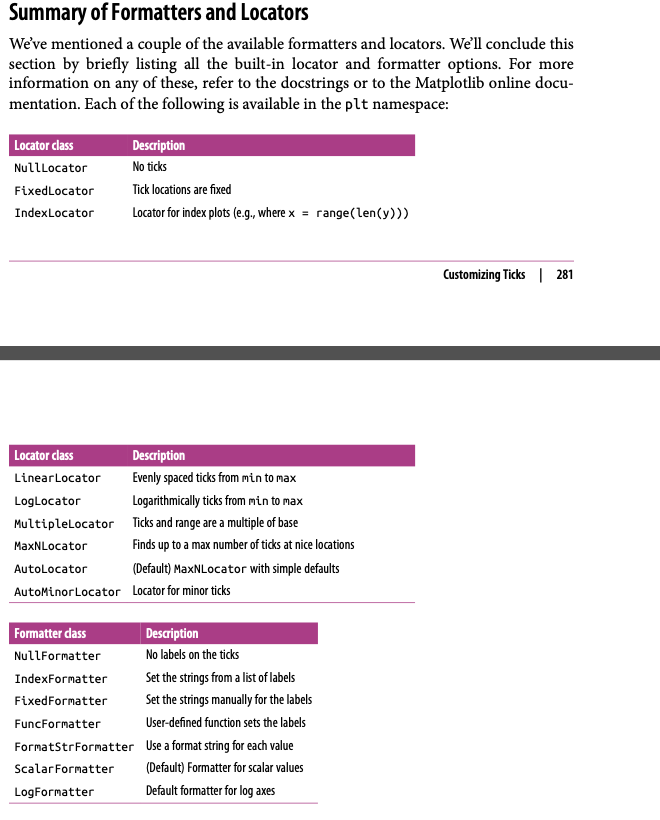

# Customizing Matplotlib: Configuraitons and Stylesheets

## Plot Customization by Hand

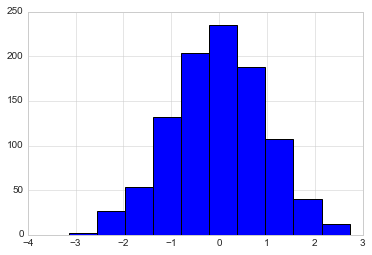

In [131]:
x = np.random.randn(1000) 
plt.hist(x);

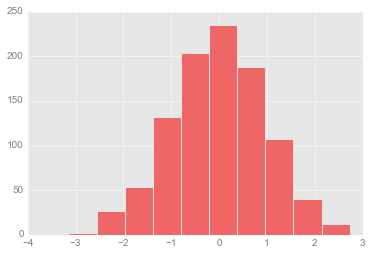

In [141]:
# Gray bg
ax = plt.axes(facecolor='#E6E6E6', axisbelow=True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis splines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top/ right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')   

#control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## Changing the Defaults: rcParams
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. You can adjust this configuration at any time using the plt.rc convenience routine. Let’s see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

In [142]:
IPython_default = plt.rcParams.copy()

In [143]:
from matplotlib import cycler 
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
                '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid') 
plt.rc('xtick', direction='out', color='gray') 
plt.rc('ytick', direction='out', color='gray') 
plt.rc('patch', edgecolor='#E6E6E6') 
plt.rc('lines', linewidth=2)

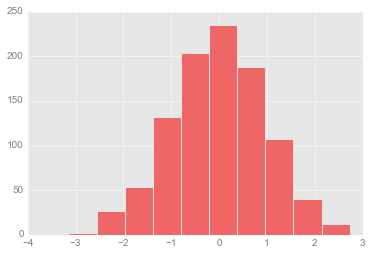

In [144]:
plt.hist(x);

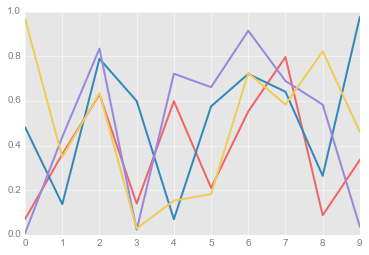

In [145]:
for i in range(4):
    plt.plot(np.random.rand(10))

## Stylesheets

In [146]:
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

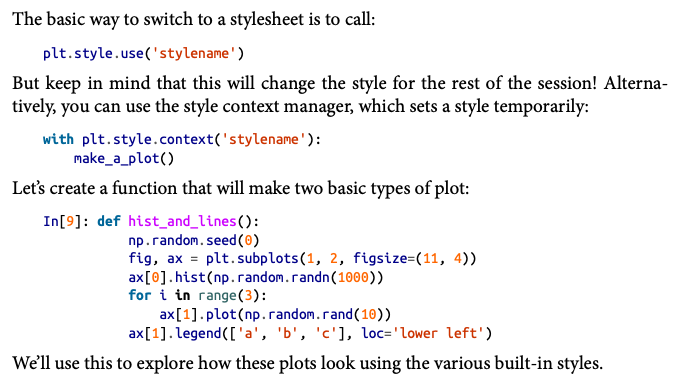

In [147]:
def hist_and_lines(): 
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4)) 
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10)) 
        ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style


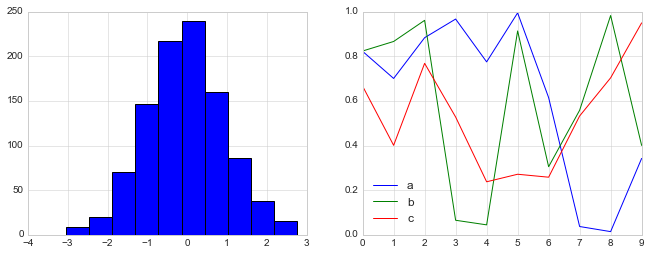

In [149]:
hist_and_lines()

### FiveThirtyEight

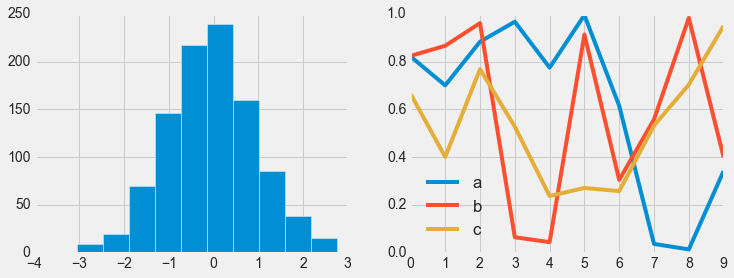

In [150]:
with plt.style.context('fivethirtyeight'): hist_and_lines()


### ggplot

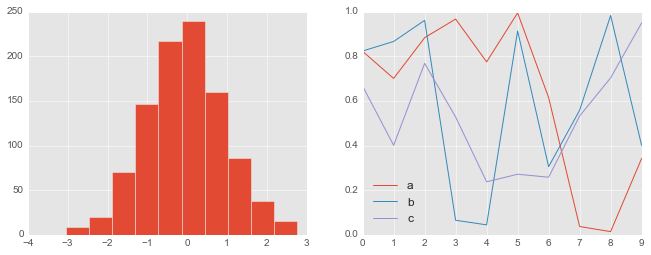

In [151]:
with plt.style.context('ggplot'): hist_and_lines()

### Bayesian Methods for Hackers style

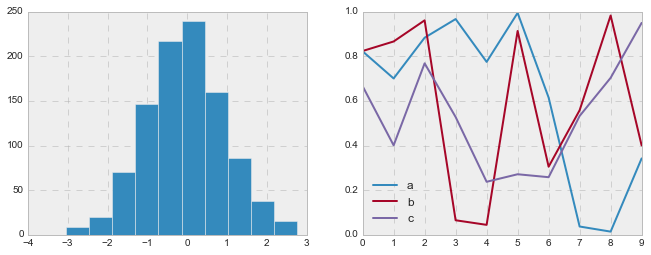

In [152]:
with plt.style.context('bmh'): hist_and_lines()

### Dark background

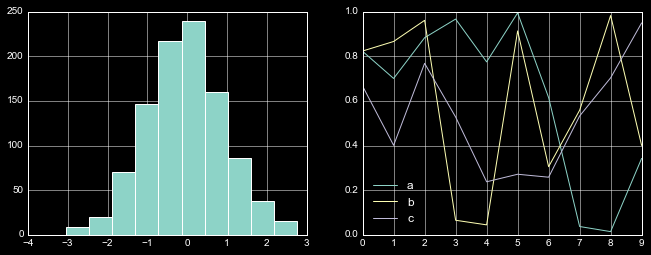

In [153]:
with plt.style.context('dark_background'): hist_and_lines()

### Grayscale

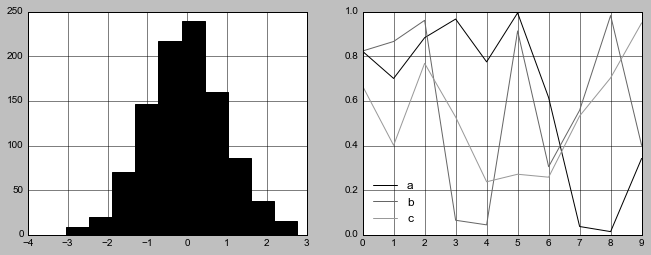

In [154]:
 with plt.style.context('grayscale'): hist_and_lines()


### Seaborn style

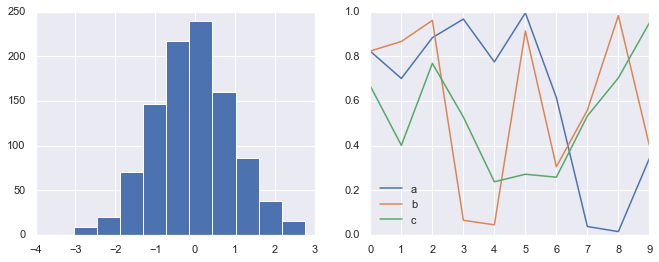

In [158]:
seaborn.set()
hist_and_lines()

# 3D Plotting

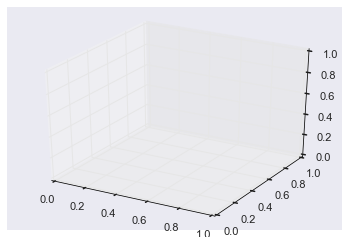

In [160]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## Three-Dimensional Points and Lines

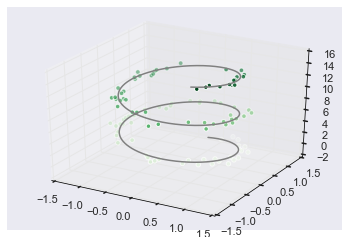

In [161]:
 ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000) 
xline = np.sin(zline)
yline = np.cos(zline) 
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) 
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [163]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30) 
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y) 
Z=f(X,Y)

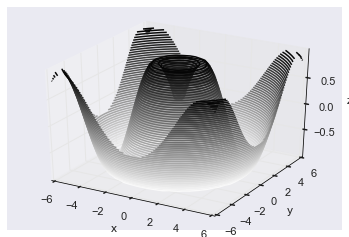

In [167]:
fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.contour3D(X, Y, Z, 50, cmap='binary') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

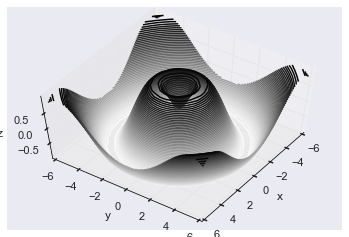

In [169]:
# change view angle
ax.view_init(60, 35) 
fig

## Wireframes and Surface plots

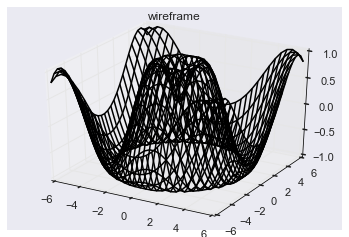

In [170]:
fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.plot_wireframe(X, Y, Z, color='black') 
ax.set_title('wireframe');

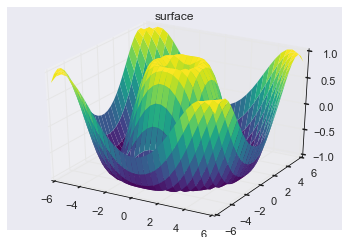

In [171]:
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none') 
ax.set_title('surface');

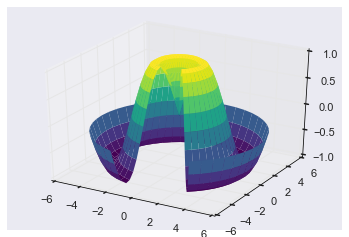

In [172]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40) 
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta) 
Y = r * np.cos(theta) 
Z=f(X,Y)
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

## Surface Triangulations

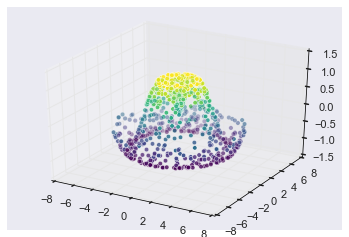

In [173]:
theta = 2 * np.pi * np.random.random(1000) 
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta)) 
y = np.ravel(r * np.cos(theta)) 
z=f(x,y)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

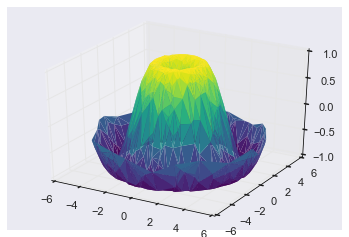

In [175]:
ax = plt.axes(projection='3d') 
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

# Geographic Data with Basemap

Read Python Datascience handbook for more info
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

# Visualization with Seaborn

## Seaborn vs Matplotlib

In [3]:
plt.style.use('classic')

In [4]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


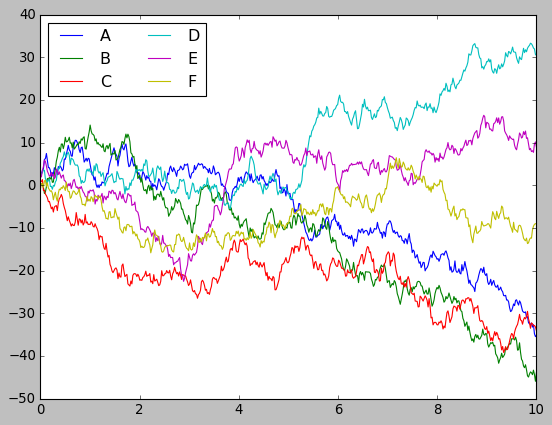

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

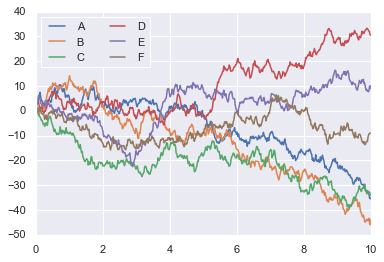

In [10]:
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Exploring Seaborn Plots

### Histogram, KDE, and densities

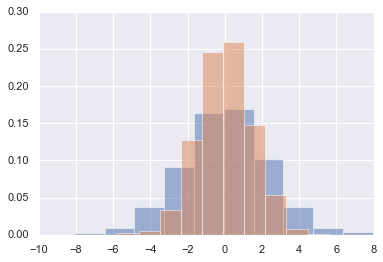

In [13]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000) 
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

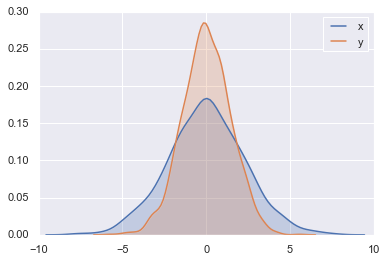

In [14]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

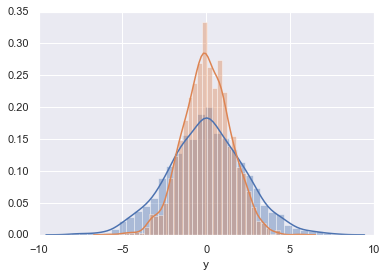

In [16]:
sns.distplot(data['x'])
sns.distplot(data['y']);

/Users/termanteuse/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


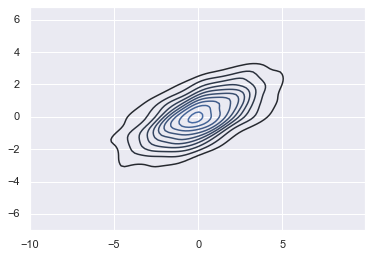

In [17]:
sns.kdeplot(data);

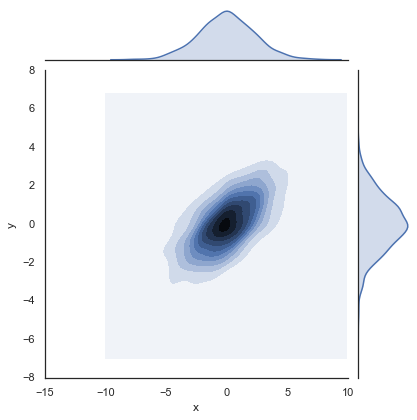

In [18]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde');

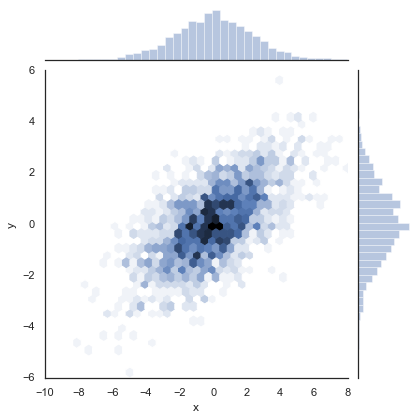

In [19]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex');

### Pair plots

In [20]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

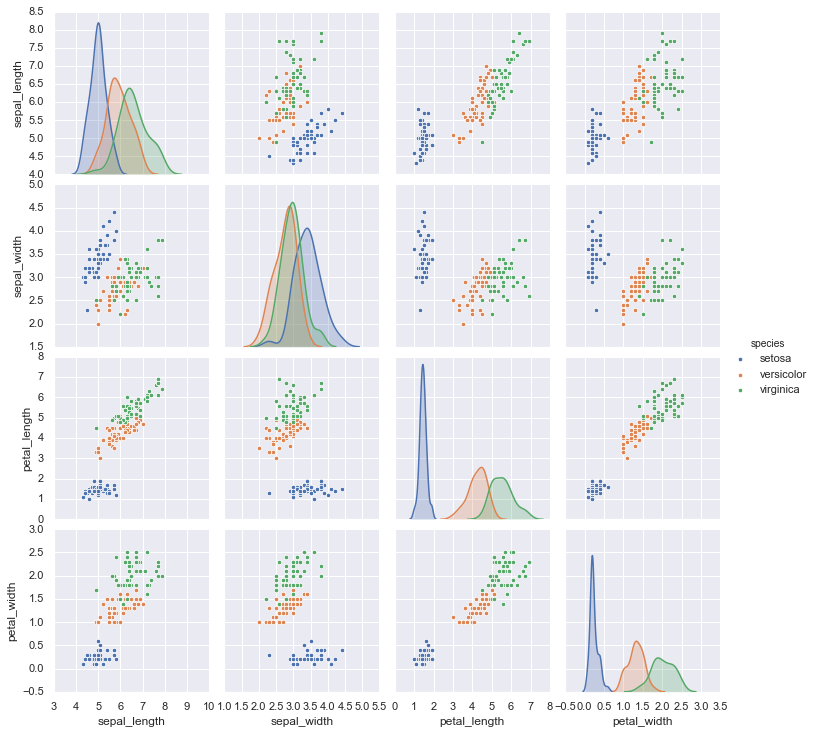

In [22]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

In [23]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

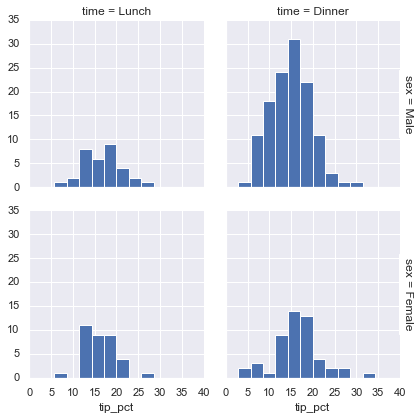

In [24]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

### Factor plots (Cat plot)

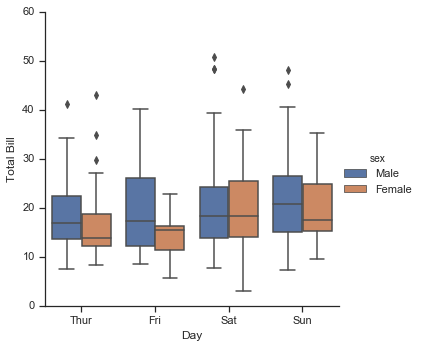

In [26]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill');

### Joint distributions

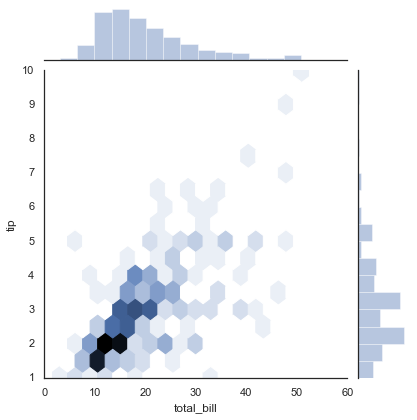

In [27]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex');

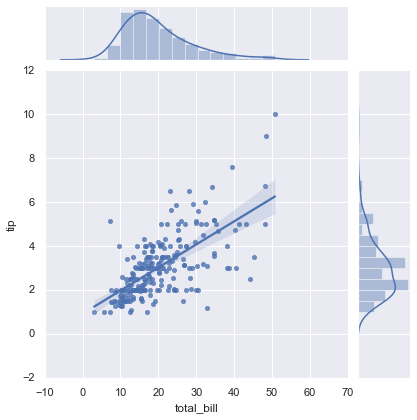

In [28]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

### Bar plots

In [29]:
planets = sns.load_dataset('planets') 
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

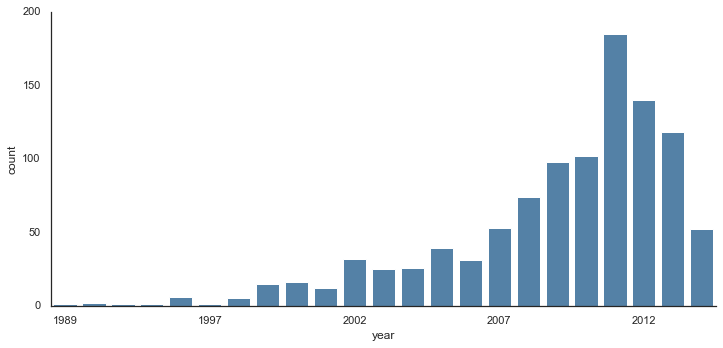

In [31]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=planets, aspect=2,
                       kind='count', color='steelblue')
    g.set_xticklabels(step=5)

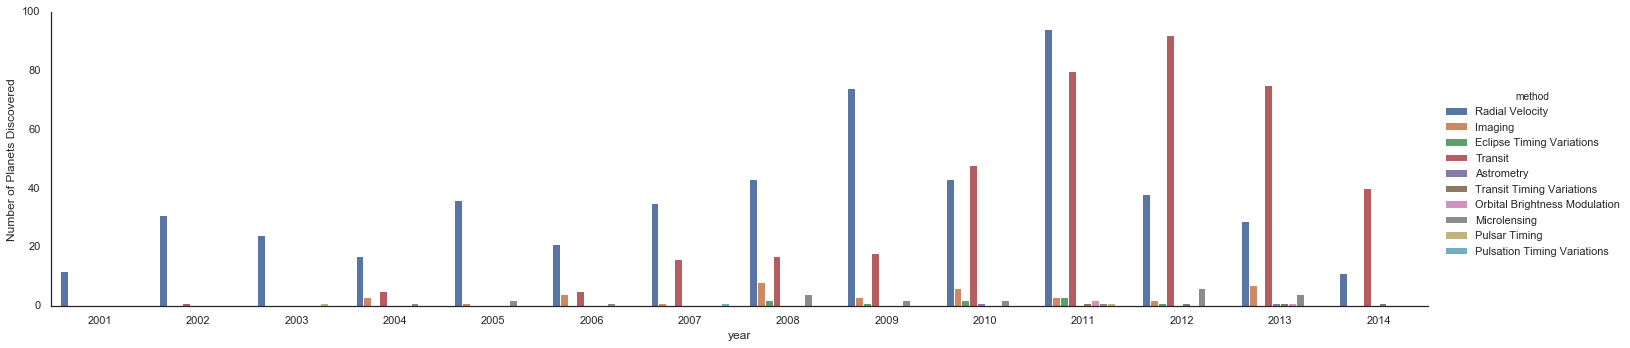

In [33]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015)) 
    g.set_ylabels('Number of Planets Discovered')


## Example

In [34]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   892k      0 --:--:-- --:--:-- --:--:--  891k


In [36]:
 data = pd.read_csv('marathon-data.csv') 
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [39]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [40]:
data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

age gender    split    final
0   33      M 01:05:38 02:08:51
1   32      M 01:06:26 02:09:28
2   31      M 01:06:49 02:10:42
3   38      M 01:06:16 02:13:45
4   31      M 01:06:32 02:13:59

In [41]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [42]:
data['split_sec'] = data['split'].astype(int) / 1E9 
data['final_sec'] = data['final'].astype(int) / 1E9 
data.head()

age gender    split    final  split_sec  final_sec
0   33      M 01:05:38 02:08:51     3938.0     7731.0
1   32      M 01:06:26 02:09:28     3986.0     7768.0
2   31      M 01:06:49 02:10:42     4009.0     7842.0
3   38      M 01:06:16 02:13:45     3976.0     8025.0
4   31      M 01:06:32 02:13:59     3992.0     8039.0

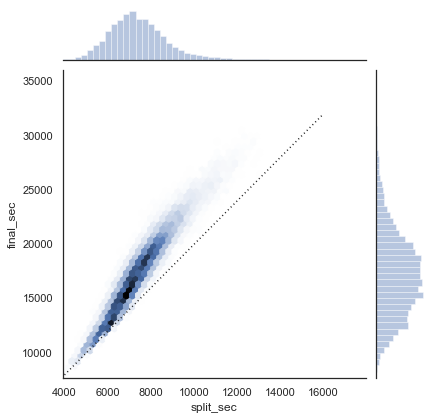

In [43]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex') 
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [44]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec'] 
data.head()

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842

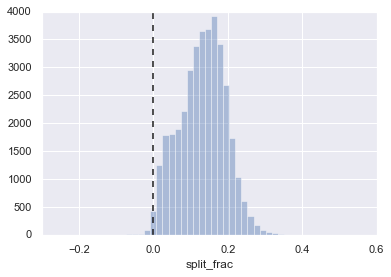

In [45]:
sns.distplot(data['split_frac'], kde=False); 
plt.axvline(0, color="k", linestyle="--");

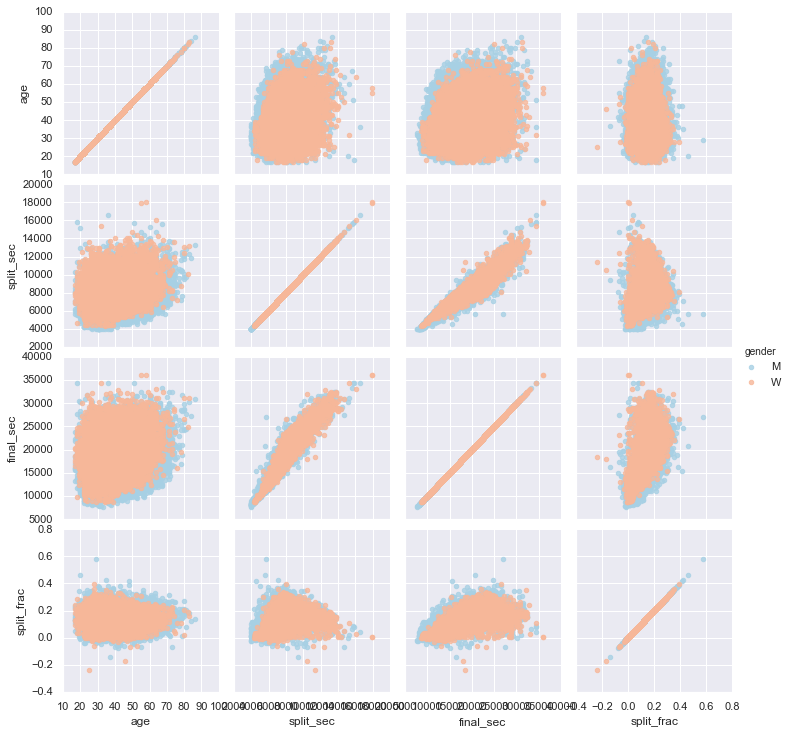

In [48]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r') 
g.map(plt.scatter, alpha=0.8)
g.add_legend();

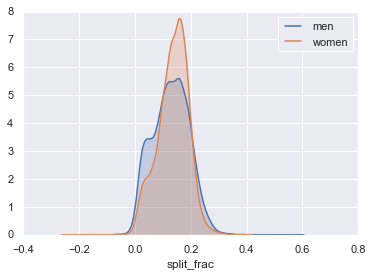

In [49]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True) 
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True) 
plt.xlabel('split_frac');

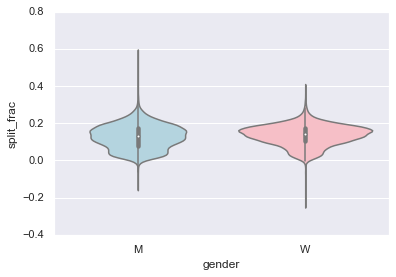

In [50]:
sns.violinplot("gender", "split_frac", data=data,
                   palette=["lightblue", "lightpink"]);

In [51]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))

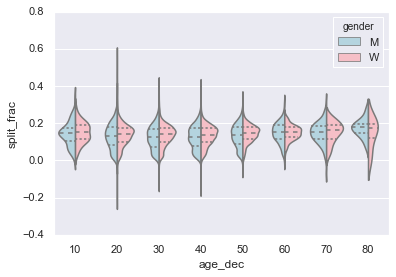

In [52]:
men = (data.gender == 'M') 
women = (data.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                      split=True, inner="quartile",
                      palette=["lightblue", "lightpink"]);

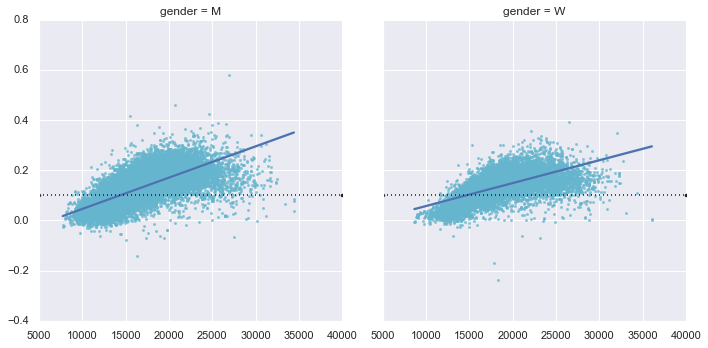

In [53]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");